## Numpy

- NumPy is the fundamental package for scientific computing in Python. 
- It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Installation 

```
pip install numpy
```

For plotting we will use matplotlib

```
pip install matplotlib


pip install numpy matplotlib python-opencv 
```

## Matrix Operations
[source](https://en.wikipedia.org/wiki/Matrix_(mathematics))

1 - Add 

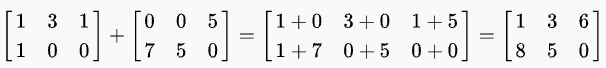

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
def plot(arr):
    print(arr)
    plt.imshow(arr, cmap='gray')
    plt.show()

[[1 3 1]
 [1 0 0]]


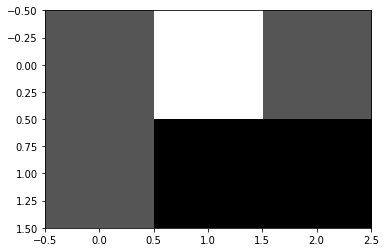

In [24]:
a = np.array(
[ [1, 3, 1], [1, 0, 0] ] 
)
plot(a)

In [25]:
b = np.array(
[ [0, 0, 5], [7, 5, 0] ] 
)
b

array([[0, 0, 5],
       [7, 5, 0]])

[[0 0 5]
 [7 5 0]]


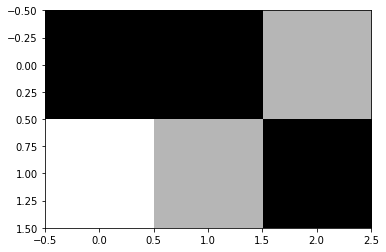

In [26]:
plot(b)

[[1 3 6]
 [8 5 0]]


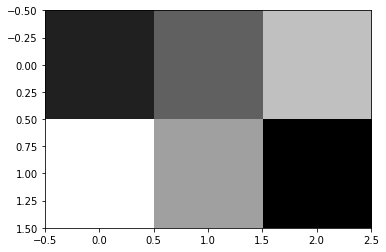

In [27]:
r = a + b
plot(r)

Using numpy to add 2 numbers
[source](https://numpy.org/doc/stable/reference/generated/numpy.add.html)

[[1 3 6]
 [8 5 0]]


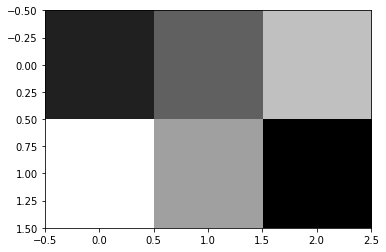

In [28]:
r = np.add(a,b)
plot(r)

2 - Scalar Dot Matrix

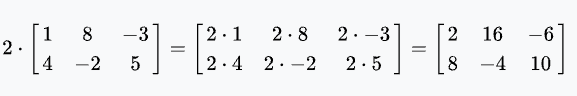

[[ 1  8 -3]
 [ 4 -2  5]]


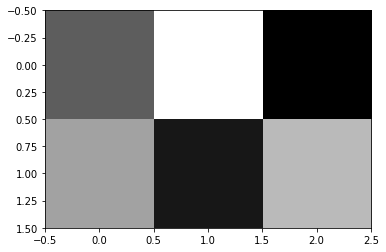

In [29]:
a = np.array(
[ [1, 8, -3], [4, -2, 5] ] 
)
plot(a)

[[ 2 16 -6]
 [ 8 -4 10]]


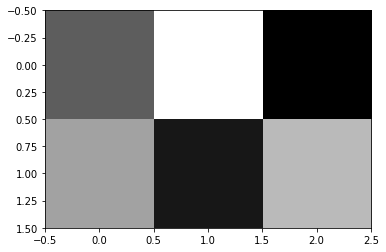

In [30]:
r = 2 * a
plot(r)

Using numpy dot function
[source](https://numpy.org/doc/stable/reference/generated/numpy.dot.html?highlight=dot#numpy.dot)

[[ 2 16 -6]
 [ 8 -4 10]]


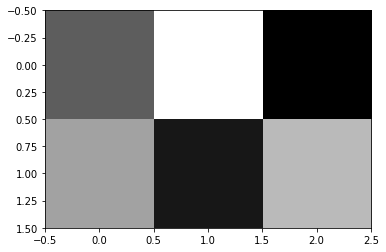

In [31]:
r = np.dot(2, a)
plot(r)

3 - Transpose Matrix

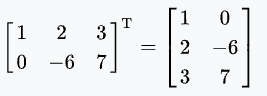

[[ 1  2  3]
 [ 0 -6  7]]


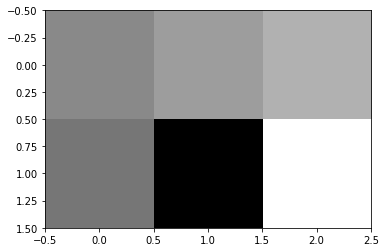

In [32]:
a = np.array(
[
    [1,2,3],
    [0,-6,7]
]
)
plot(a)

[[ 1  0]
 [ 2 -6]
 [ 3  7]]


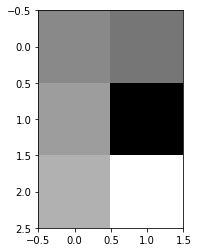

In [33]:
r = np.transpose(a)
plot(r)

4 - Matrix Multiplication

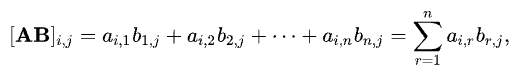

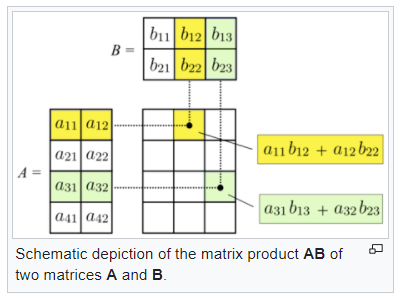

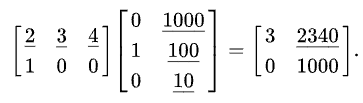

[[2 3 5]
 [1 0 0]]


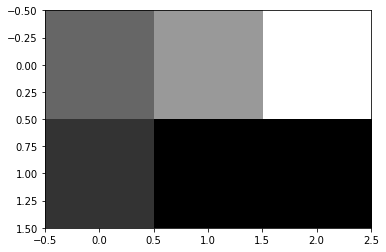

In [34]:
a = np.array([
    [2,3,5],
    [1,0,0]
])
plot(a)

In [35]:
a.shape

(2, 3)

[[   0 1000]
 [   1  100]
 [   0   10]]


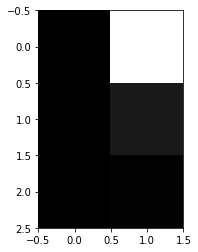

In [36]:
b = np.array([
    [0,1000],
    [1,100],
    [0,10]
])
plot(b)

In [37]:
b.shape

(3, 2)

In [38]:
a * b

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

[[   3 2350]
 [   0 1000]]


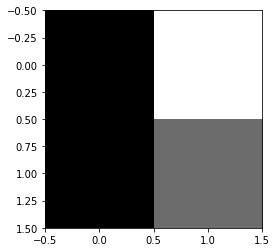

In [39]:
r = np.dot(a, b)
plot(r)

4 - Linear equations

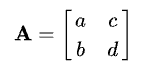

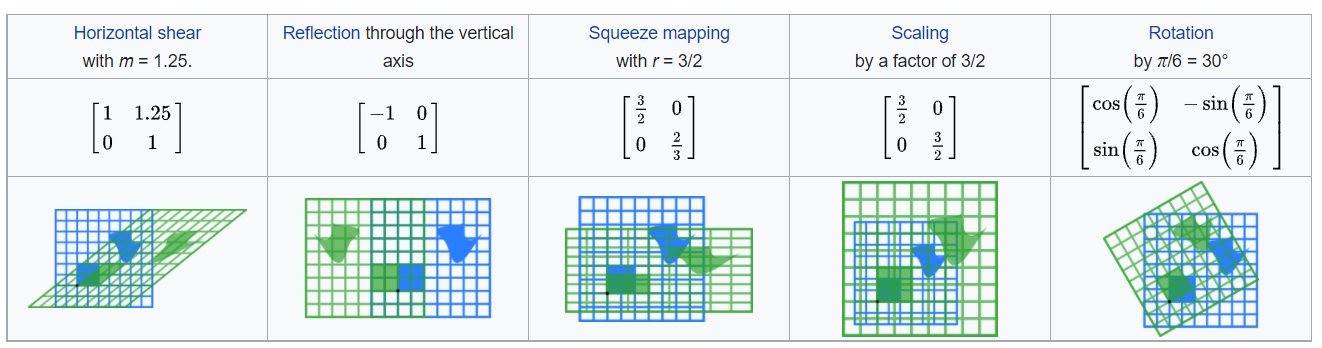

## Linear Operations 

Disclaimer [source](https://mmas.github.io/linear-transformations-numpy)

In [40]:
aux = np.ones((100, 100), dtype=int)
aux

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [41]:
aux.shape

(100, 100)

In [42]:
src = np.vstack(
    [
        np.c_[aux, 2*aux], 
        np.c_[3*aux, 4*aux]
    ]
)
src

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4]])

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]]


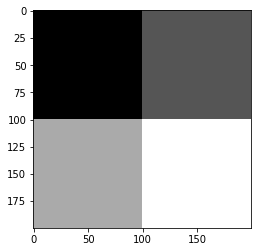

In [43]:
plot(src)

### Linear Transformation

Scaling the plane in the x-axis by a factor of 1.5

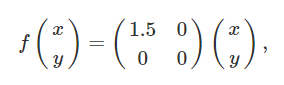

In [44]:
def linear_transformation(src, a):
    M, N = src.shape
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    new_points = np.linalg.inv(a).dot(points).round().astype(int)
    x, y = new_points.reshape((2, M, N), order='F')
    indices = x + N*y
    return np.take(src, indices, mode='wrap')

[[1.5 0. ]
 [0.  1. ]]


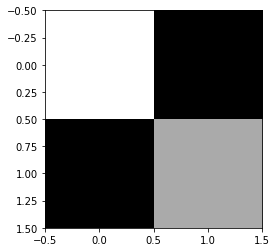

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]]


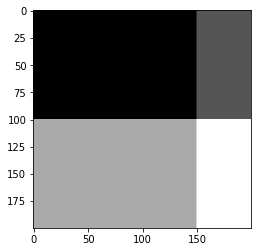

In [45]:
a = np.array([
    [1.5, 0],
    [0, 1]
])
plot(a)
dst = linear_transformation(src, a)
plot(dst)

Dilating the plane by a factor of 1.8

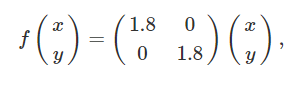

[[1.8 0. ]
 [0.  1.8]]


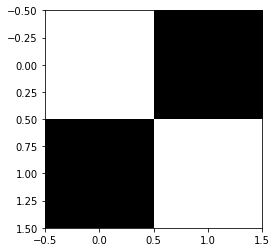

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]]


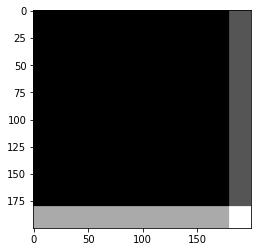

In [46]:
a = 1.8*np.eye(2)
plot(a)
dst = linear_transformation(src, a)
plot(dst)

Dilating the plane by a factor of 0.5

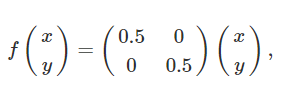

[[0.5 0. ]
 [0.  0.5]]


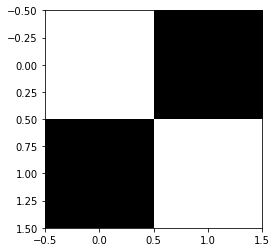

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]]


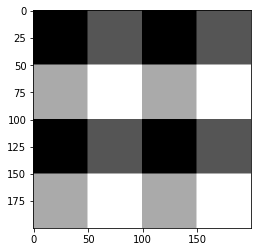

In [47]:
a = .5*np.eye(2)
plot(a)
dst = linear_transformation(src, a)
plot(dst)

Scaling the plane in the y-axis by a factor of 0.5

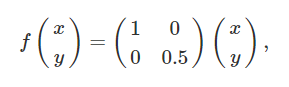

[[1.  0. ]
 [0.  0.5]]


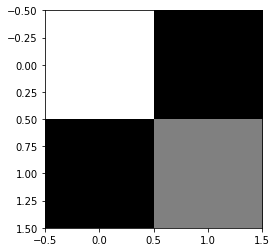

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]]


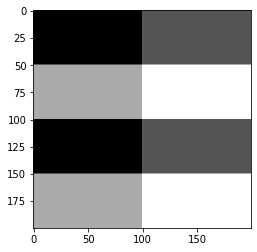

In [48]:
a = np.array([[1, 0],
              [0, .5]])
plot(a)
dst = linear_transformation(src, a)
plot(dst)

Shearing about the y-axis with a vertical displacement of +x/2

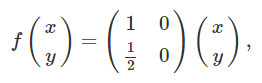

[[1.  0. ]
 [0.5 1. ]]


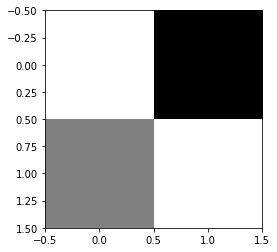

[[1 1 3 ... 4 4 4]
 [1 1 1 ... 4 4 4]
 [1 1 1 ... 4 4 4]
 ...
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 4 2 2]
 [3 3 3 ... 4 4 4]]


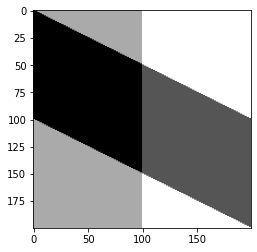

In [49]:
a = np.array([[1, 0],
              [.5, 1]])
plot(a)
dst = linear_transformation(src, a)
plot(dst)

Rotation through 45∘ about the origin

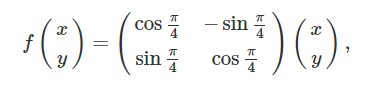

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


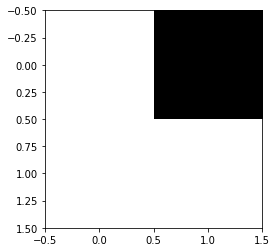

[[1 3 3 ... 2 2 2]
 [1 1 3 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]]


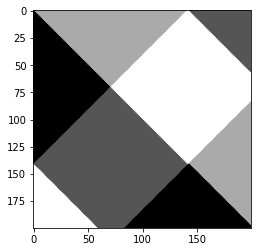

In [50]:
alpha = np.pi/4
a = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])
plot(a)
dst = linear_transformation(src, a)
plot(dst)

Reflexion in a line with inclination of 45∘ through the origin

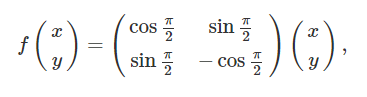

[[ 6.123234e-17  1.000000e+00]
 [ 1.000000e+00 -6.123234e-17]]


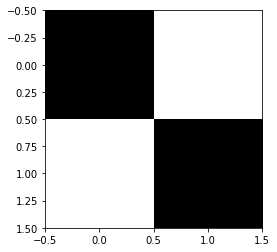

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]]


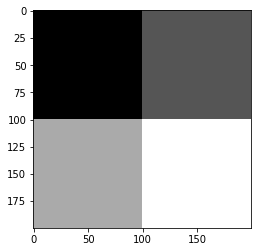

[[1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]


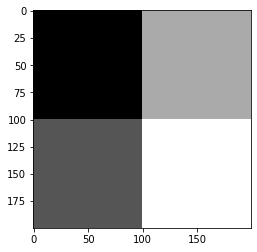

In [51]:
alpha = np.pi/4
a = np.array([[np.cos(2*alpha), np.sin(2*alpha)],
              [np.sin(2*alpha), -np.cos(2*alpha)]])
plot(a)
dst = linear_transformation(src, a)
plot(src)
plot(dst)

<center>
    <u>
        <h2>
            If you remember the slides from the last life
        </h2>
    </u>
</center>

<br>

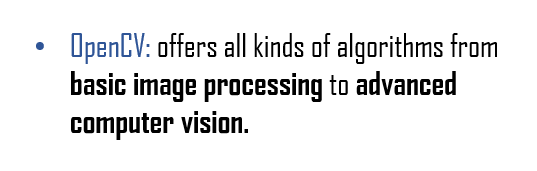

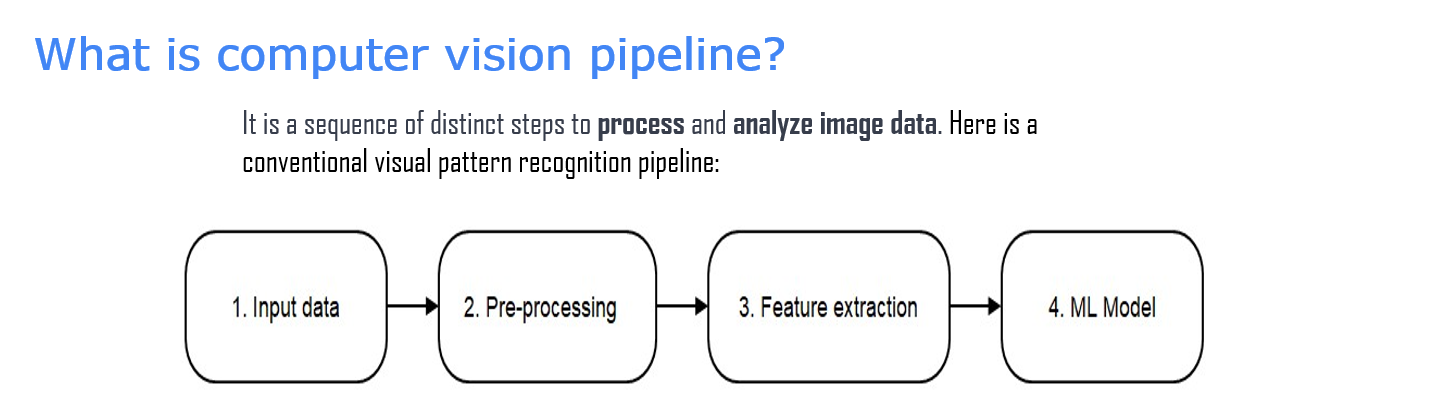

The first library to computer vision in OpenCv

OpenCV was started at Intel in 1999 by Gary Bradsky, and the first release came out in 2000. Vadim Pisarevsky joined Gary Bradsky to manage Intel's Russian software OpenCV team. In 2005, OpenCV was used on Stanley, the vehicle that won the 2005 DARPA Grand Challenge. Later, its active development continued under the support of Willow Garage with Gary Bradsky and Vadim Pisarevsky leading the project. OpenCV now supports a multitude of algorithms related to Computer Vision and Machine Learning and is expanding day by day.

OpenCV-Python
OpenCV-Python is a library of Python bindings designed to solve computer vision problems.

In [12]:
import numpy as np
import cv2 as cv

basic operations using openCV 

Pyimage search is once of the best resources for learning computer vision stuff
[source](https://www.pyimagesearch.com/)

The following code is from Pyimage search
[source](https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/)

In [13]:
# When reading image with opencv it is loaded with BGR (Blue, Green, Red) => (255, 255, 255)
image = cv.imread("alhasif.png")

(h, w, d) = image.shape

print("width={}, height={}, depth={}".format(w, h, d))

width=2528, height=1615, depth=3


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


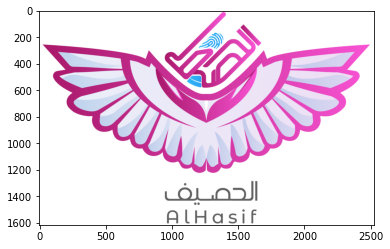

In [14]:
plot(image)

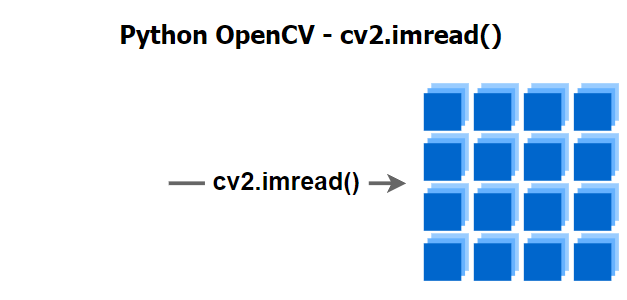

Syntax
----------

```
cv2.imread("/path/to/image", flag)
```

- The flag:
   - cv2.IMREAD_COLOR:
       reads the image with RGB-BGR colors but no transparency channel, default selection.
   - cv2.IMREAD_GRAYSCALE:
       reads the image as grey image.
   - cv2.IMREAD_UNCHANGED:
       reads the image as is from the source. If the source image is an RGB, it loads the image into array with Red, Green and Blue channels. If the source image is ARGB, it loads the image with three color components along with the alpha or transparency channel.

width=2528, height=1615, channels=3
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


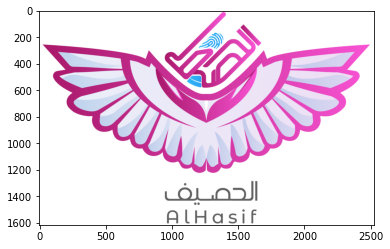

In [56]:
# When reading image with opencv it is loaded with RGB (Red, Green, Blue) => (255, 255, 255)
image = cv.imread("alhasif.png", cv2.IMREAD_COLOR)

(h, w, d) = image.shape

print("width={}, height={}, channels={}".format(w, h, d))

plot(image)

(height, width, number_of_channels)

- (h, w, d) = image.shape
- (100, 100, 3)
- the image is 400 pixels, width is 640 and 3 are three color channels (RGB) in the image
- (100, 100, 4)
- the image is 400 pixels, width is 640 and 4 are three color channels (RGBA) in the image A(Transperancey)

- JPEG, PNG, TIFF

[source](https://pythonexamples.org/python-opencv-read-image-cv2-imread/)

(1615, 2528)
width=2528, height=1615
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


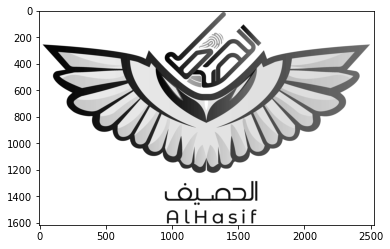

In [21]:
image = cv.imread("alhasif.png", cv2.IMREAD_GRAYSCALE)

print(image.shape)

(h, w) = image.shape

print("width={}, height={}".format(w, h))

plot(image)

(1615, 2528, 3)
width=2528, height=1615, channels=3


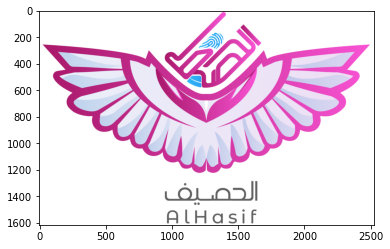

In [59]:
image = cv.imread("alhasif.png", cv2.IMREAD_UNCHANGED)

print(image.shape)

(h, w, d) = image.shape

print("width={}, height={}, channels={}".format(w, h, d))

# plot(image)

plt.imshow(image)
plt.show()

## Color Space

Various color spaces such as RGB, BGR, HSV can be mutually converted using OpenCV

(1615, 2528, 3)
width=2528, height=1615, channels=3
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


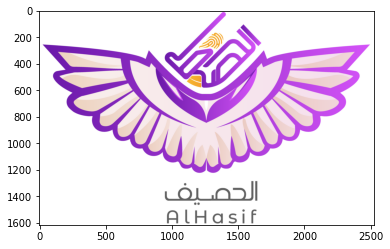

In [60]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)

(h, w, d) = image.shape

print("width={}, height={}, channels={}".format(w, h, d))

# plot(image)

plot(image)

## Resize Image

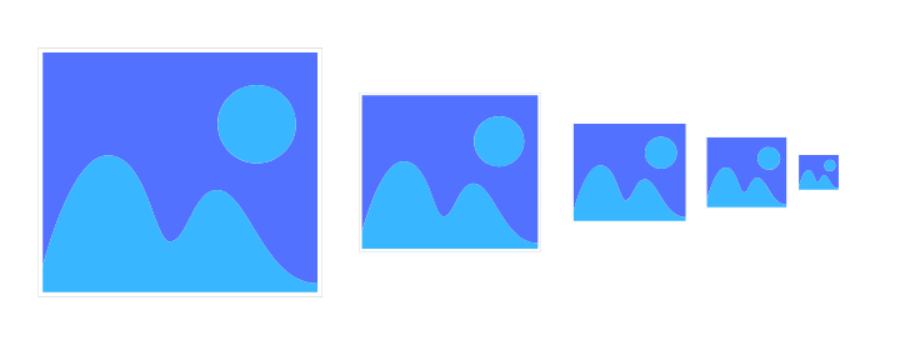

```
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
```

- src: is the source, original or input image in the form of numpy array
- dsize: is the desired size of the output image, given as tuple
- fx: is the scaling factor along X-axis or Horizontal axis
- fy: is the scaling factor along Y-axis or Vertical axis
- interpolation: Based on the interpolation technique selected, respective algorithm is used. You can think interpolation as a method that decides which pixel gets which value based on its neighboring pixels and the scale at which the image is being resized.
    - INTER_NEAREST
    - INTER_LINEAR
    - INTER_AREA
    - INTER_CUBIC
    - INTER_LANCZOS4

width=1000, height=2528, channels=3
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


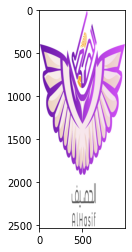

In [63]:
output = cv2.resize(image, (1000, 2528))

(h, w, d) = output.shape

print("width={}, height={}, channels={}".format(w, h, d))

plot(output)

width=1615, height=1000, channels=3
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


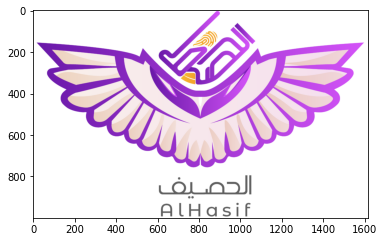

In [64]:
output = cv2.resize(image, (1615, 1000))

(h, w, d) = output.shape

print("width={}, height={}, channels={}".format(w, h, d))

plot(output)

width=1264, height=807, channels=3
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


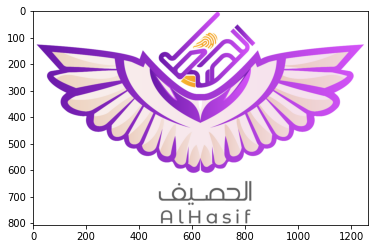

In [69]:
# be careful => dsize = (width, height)
output = cv2.resize(image, (image.shape[1]//2, image.shape[0]//2))

(h, w, d) = output.shape

print("width={}, height={}, channels={}".format(w, h, d))

plot(output)

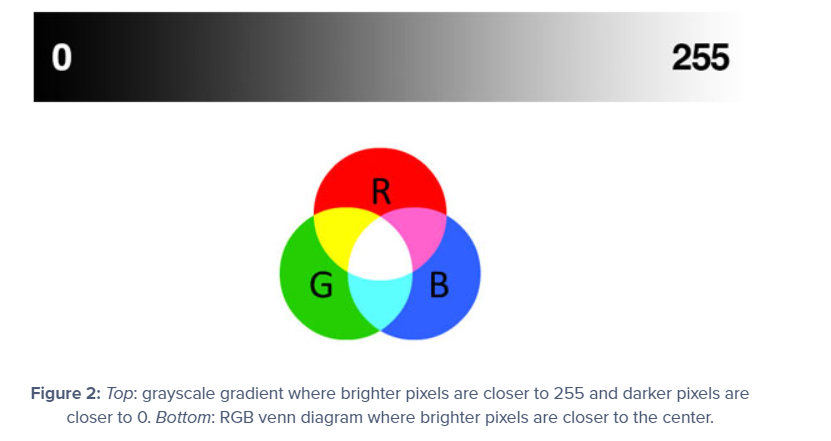

### What is a pixel

All images consist of pixels which are the raw building blocks of images. Images are made of pixels in a grid. A 640 x 480 image has 640 columns (the width) and 480 rows (the height). There are 640 * 480 = 307200 pixels in an image with those dimensions.

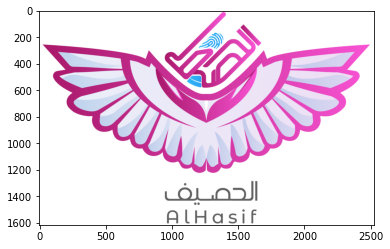

In [74]:
image = cv.imread("alhasif.png", cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.show()

In [75]:
(B, G, R) = image[100, 50]
print(B, G, R)

255 255 255


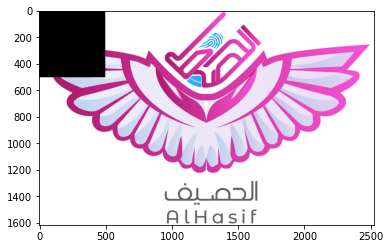

In [76]:
for i in range(1, 500):
    for j in range(1,500):
        image[i, j] = (0,0,0)
plt.imshow(image)
plt.show()

#### Pixel Can Be

- Black: (0, 0, 0)
- White: (255, 255, 255)
- Red: (255, 0, 0)
- Green: (0, 255, 0)
- Blue: (0, 0, 255)
- Aqua: (0, 255, 255)
- Fuchsia: (255, 0, 255)
- Maroon: (128, 0, 0)
- Navy: (0, 0, 128)
- Olive: (128, 128, 0)
- Purple: (128, 0, 128)
- Teal: (0, 128, 128)
- Yellow: (255, 255, 0)

[source](https://www.pyimagesearch.com/2021/01/20/opencv-getting-and-setting-pixels/)

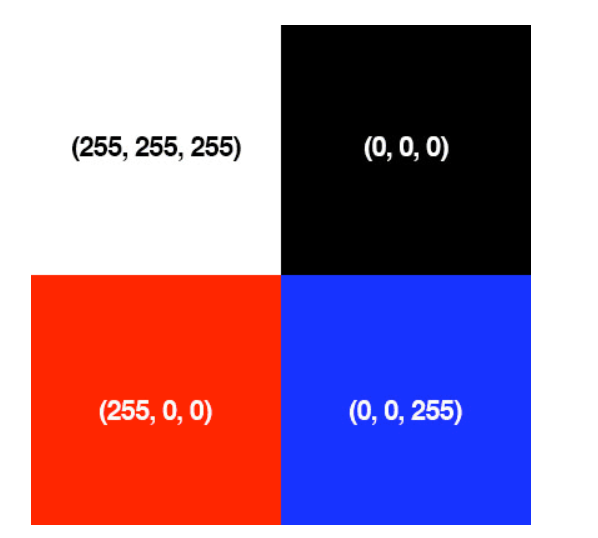

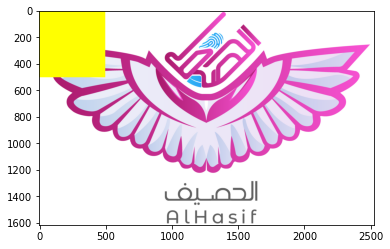

In [79]:
for i in range(1, 500):
    for j in range(1,500):
        image[i, j] = (255, 255, 0)
plt.imshow(image)
plt.show()

### Drawing

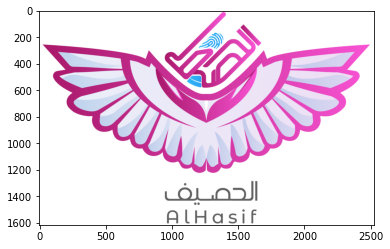

In [148]:
image = cv.imread("alhasif.png", cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.show()

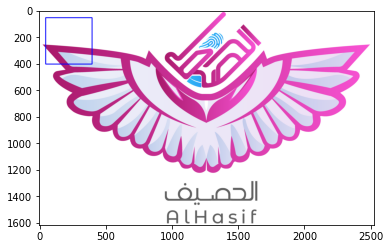

In [149]:
output = image.copy()
cv2.rectangle(output, (50, 50), (400, 400), (0, 0, 255), 5)
plt.imshow(output)
plt.show()

```
rectangle(image, top_left_pixel_location, bottom_right_pixel_location, rectangle_color, thickness)
```

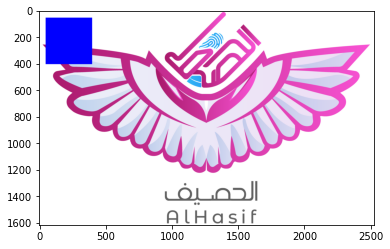

In [190]:
output = image.copy()
# if border thickness is -1 then it is called filling
cv2.rectangle(output, (50, 50), (400, 400), (0, 0, 255), -1) 
plt.imshow(output)
plt.show()

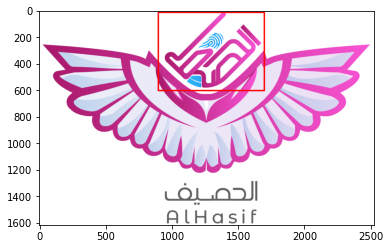

In [150]:
output = image.copy()
cv2.rectangle(output, (900, 10), (1700, 600), (255, 0, 0), 10)
plt.imshow(output)
plt.show()

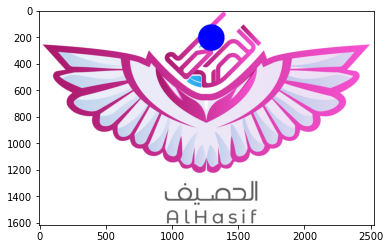

In [151]:
output = image.copy()
cv2.circle(output, (1300, 200), 100, (0, 0, 255), -1)
plt.imshow(output)
plt.show()

```
cv2.circle(image, center_of_circle, circle_radius, circle_color, thickness)
```

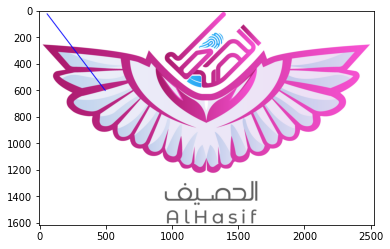

In [153]:
output = image.copy()
cv2.line(output, (60, 20), (500, 600), (0, 0, 255), 5)
plt.imshow(output)
plt.show()

```
cv2.line(image, top_left_pixel_location, bottom_right_pixel_location, line_color, thickness)
```

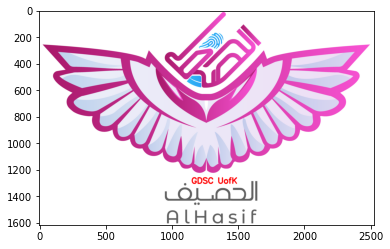

In [174]:
output = image.copy()
cv2.putText(output, "GDSC UofK", (1150, 1300), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 7)
plt.imshow(output)
plt.show()

```
cv2.putText(img, text, starting_point, font_type, font_scale, font_color, thickness)
```

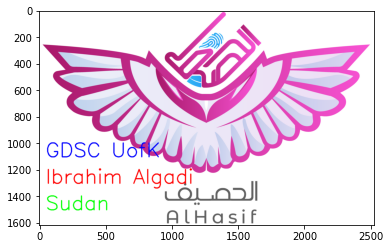

In [188]:
output = image.copy()
cv2.putText(output, "GDSC UofK", (50, 1100), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 255), 7)
cv2.putText(output, "Ibrahim Algadi", (50, 1300), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 0), 7)
cv2.putText(output, "Sudan", (50, 1500), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 7)
plt.imshow(output)
plt.show()

I want to carify each function input so it is clear for people what the input does ...

### Transformation

Blur

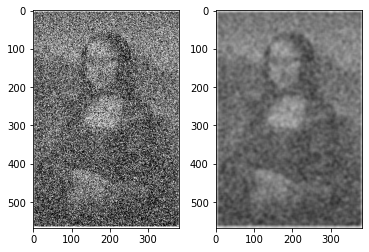

In [140]:
image = cv.imread("noise.png", cv2.IMREAD_UNCHANGED)
blurred = cv2.GaussianBlur(image, (11, 11),cv2.BORDER_DEFAULT)

# using Subplot matlab style
# https://matplotlib.org/stable/tutorials/introductory/pyplot.html

plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(blurred)
plt.show()

Resizing

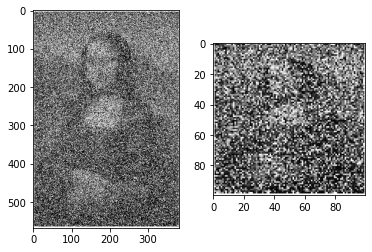

In [139]:
image = cv.imread("noise.png", cv2.IMREAD_UNCHANGED)
result = cv2.resize(image, (100, 100))
# using Subplot matlab style
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(result)
plt.show()

Rotation

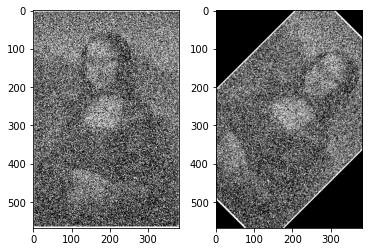

In [141]:
image = cv.imread("noise.png", cv2.IMREAD_UNCHANGED)

(h, w, d) = image.shape

# get the image center
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)

result = cv2.warpAffine(image, M, (w, h))
# using Subplot matlab style
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(result)
plt.show()

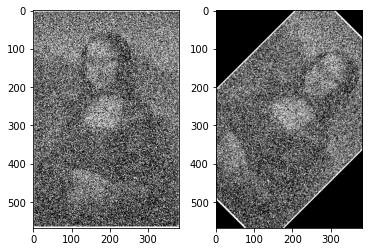

In [144]:
image = cv.imread("noise.png", cv2.IMREAD_UNCHANGED)

(h, w, d) = image.shape

# get the image center
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
# Affine Transformation
result = cv2.warpAffine(image, M, (w, h))

# using Subplot matlab style
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(result)
plt.show()

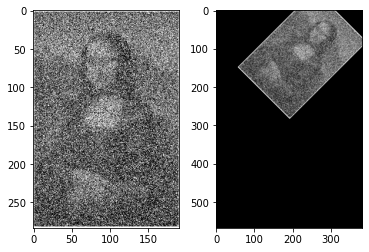

In [146]:
image = cv.imread("noise.png", cv2.IMREAD_UNCHANGED)

(h, w, d) = image.shape

resized_image = cv2.resize(image, (w // 2, h // 2))

# get the image center
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)

# Affine Transformation
result = cv2.warpAffine(resized_image, M, (w, h))

# using Subplot matlab style
plt.subplot(121)
plt.imshow(resized_image)
plt.subplot(122)
plt.imshow(result)
plt.show()

## Ready Made detection models

http://www.worldlicenseplates.com/world/AF_SUDA.html

In [286]:
image = cv.imread("AF_SUDA_GI.jpg", cv2.IMREAD_UNCHANGED)
print(image.shape)

(403, 600, 3)


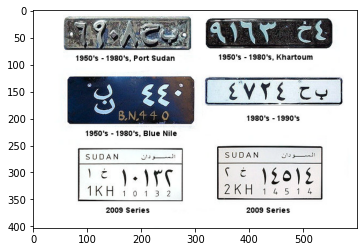

In [287]:
plt.imshow(image)
plt.show()

### Pytesseract OCR

```
pip install pytesseract
```

In [288]:
import pytesseract

In [289]:
print(pytesseract.image_to_string(image))

 

1950's - 1980's, Khartoum

1950's - 1980's, Blue Nile

 

 

SUDAN SUDAN
hoe Ge 6
aT] [bees

 

2009 Series 2009 Series



In [290]:
print(pytesseract.image_to_string(image, lang='Script/Arabic'))

 

1950's - 1980's, Khartoum

1950's - 1980's, Blue Nile

 

SUDAN SUDAN
ê € ۵
E lk

 

2009 Series 2009 Series

 



(403, 600, 3)


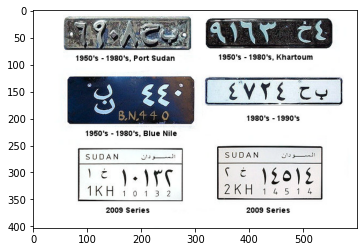

In [291]:
(h, w, _) = image.shape
cropped = image[:h, :w]
print(cropped.shape)
plt.imshow(cropped)
plt.show()

(107, 203, 3)


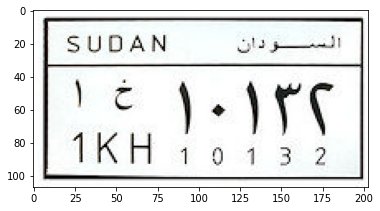

In [292]:
(h, w, _) = image.shape
cropped = image[h-152:h-45, 77:w-320]
print(cropped.shape)
plt.imshow(cropped)
plt.show()

In [293]:
print(pytesseract.image_to_string(cropped))

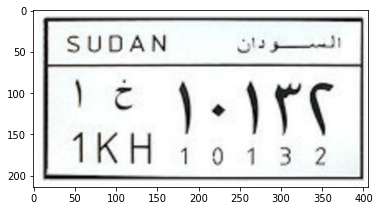

ABN

1KH 1 o



In [294]:
output = cv2.resize(cropped, None, (403, 600), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
plt.imshow(output)
plt.show()

print(pytesseract.image_to_string(output, lang='Script/Arabic'))

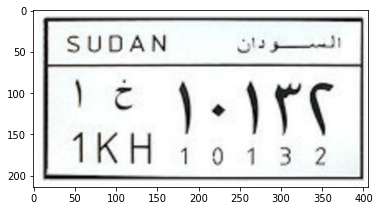

ABN

1KH 1 o



In [295]:
output = cv2.resize(cropped, None, (403, 600), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

blurred = cv2.GaussianBlur(output, (1, 1),cv2.BORDER_DEFAULT)

plt.imshow(blurred)
plt.show()

print(pytesseract.image_to_string(blurred, lang='Script/Arabic'))

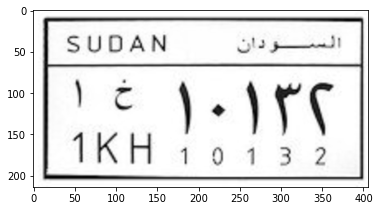

AB

1KH 1 o



In [296]:
output = cv2.resize(cropped, None, (403, 600), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# blurred = cv2.GaussianBlur(output, (1, 1),cv2.BORDER_DEFAULT)

grey_scale = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)

plt.imshow(grey_scale, cmap='gray')
plt.show()

print(pytesseract.image_to_string(grey_scale, config="--psm 3", lang='script/Arabic'))

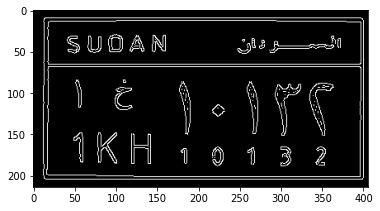

 

اسر

٢

| SUOAN

 

aR

0

 

 

 

 

 

 



In [297]:

# edge

edge_bin = cv2.Canny(grey_scale, 100, 100)

plt.imshow(edge_bin, cmap='gray')
plt.show()

print(pytesseract.image_to_string(edge_bin, config="--psm 3", lang='script/Arabic'))

 

اسر

٢

| SUOAN

 

aR

0

 

 

 

 

 

 



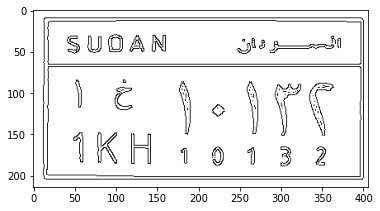

In [298]:
# Thresholding Image

#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(edge_bin,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin

print(pytesseract.image_to_string(img_bin, config="--psm 3", lang='script/Arabic'))

#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

ID card Image

https://www.google.com/search?q=Id+card&tbm=isch&ved=2ahUKEwj7tLqprdPzAhUOwIUKHZlgB4YQ2-cCegQIABAA&oq=Id+card&gs_lcp=CgNpbWcQAzIHCAAQsQMQQzIECAAQQzIICAAQgAQQsQMyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBAgAEEM6BwgjEO8DECdQmOoBWJzyAWCB-AFoAHAAeACAAYgCiAHwDZIBBTAuMy41mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=EBdtYfvsGo6AlwSZwZ2wCA&bih=722&biw=1536#imgrc=918MSl3qz45ocM&imgdii=X3ouKQoy4V2bPM


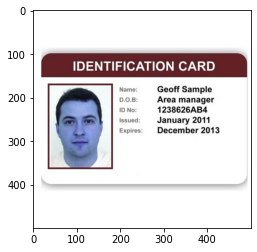

(500, 500, 3)
IDENTIFICATION CARD

Name: Geoff Sample
D.O.B: Area manager
ID No: 1238626AB4
Issued: January 2011
Expires: December 2013



In [299]:

image = cv.imread("id-card.jpg", cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.show()
print(image.shape)
card_text = pytesseract.image_to_string(image, lang='Script/Arabic')
print(card_text)

In [300]:
card_text.split('\n')

['IDENTIFICATION CARD',
 '',
 'Name: Geoff Sample',
 'D.O.B: Area manager',
 'ID No: 1238626AB4',
 'Issued: January 2011',
 'Expires: December 2013',
 '\x0c']

In [301]:
for line in card_text.split('\n'):
    print(line)

IDENTIFICATION CARD

Name: Geoff Sample
D.O.B: Area manager
ID No: 1238626AB4
Issued: January 2011
Expires: December 2013



In [302]:
for line in card_text.split('\n'):
    if 'ID' in line:
        print(line)

IDENTIFICATION CARD
ID No: 1238626AB4


In [303]:
for line in card_text.split('\n'):
    if 'ID No' in line:
        print(line)

ID No: 1238626AB4


In [304]:
for line in card_text.split('\n'):
    if 'ID No' in line:
        print(line.replace('ID No: ', ''))

1238626AB4


### Face Detection 

using pretrained models

https://www.analyticsvidhya.com/blog/2018/07/top-10-pretrained-models-get-started-deep-learning-part-1-computer-vision/

https://towardsdatascience.com/darkeras-execute-yolov3-yolov4-object-detection-on-keras-with-darknet-pre-trained-weights-5e8428b959e2

https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

Haarcascade => https://towardsdatascience.com/face-detection-with-haar-cascade-727f68dafd08

So what is Haar Cascade? 

It is an Object Detection Algorithm used to identify faces in an image or a real time video. The algorithm uses edge or line detection features proposed by Viola and Jones in their research paper “Rapid Object Detection using a Boosted Cascade of Simple Features” published in 2001. The algorithm is given a lot of positive images consisting of faces, and a lot of negative images not consisting of any face to train on them.

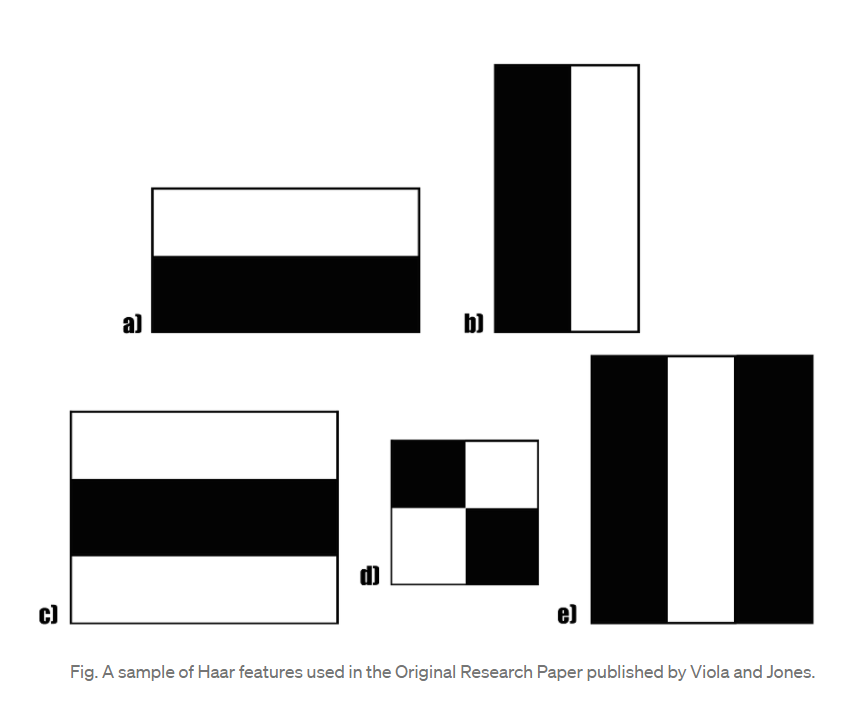

<img src='haar_detection.gif'>

https://github.com/opencv/opencv/tree/master/data/haarcascades

In [329]:
import cv2

In [341]:
# Read the input image
img = cv2.imread('sudan_famus/2.jpg')

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [342]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

print(faces)

[[457 753 988 988]]


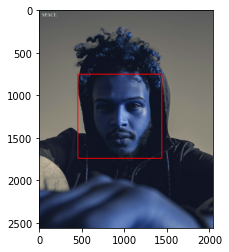

In [343]:
# Draw rectangle around the faces
tmep_image = img.copy()


for (x, y, w, h) in faces:
    cv2.rectangle(tmep_image, (x, y), (x+w, y+h), (255, 0, 0), 10)

    # Display the output
plt.imshow(tmep_image)
plt.show()

[[578 205  52  52]]


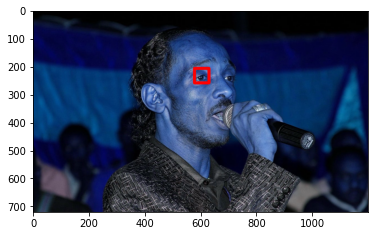

In [344]:
# Read the input image
img = cv2.imread('sudan_famus/1.jpg')

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the cascade
right_image_cascade = cv2.CascadeClassifier('haarcascade_righteye_2splits.xml')
# Detect faces
eyes = right_image_cascade.detectMultiScale(gray, 1.1, 4)

print(eyes)

# Draw rectangle
tmep_image = img.copy()

for (x, y, w, h) in eyes:
    cv2.rectangle(tmep_image, (x, y), (x+w, y+h), (255, 0, 0), 10)

    # Display the output
plt.imshow(tmep_image)
plt.show()

### Face Detection

https://google.github.io/mediapipe/


#### mediapipe
```
pip install mediapipe
```

In [43]:
import cv2
import mediapipe as mp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [44]:
mp_face_detection = mp.solutions.face_detection

In [45]:
mp_drawing = mp.solutions.drawing_utils

In [53]:
# Read the input image
img = cv2.imread('sudan_famus/2.jpg')

# Convert into grayscale
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Nose tip:
x: 0.4726942777633667
y: 0.5342410206794739



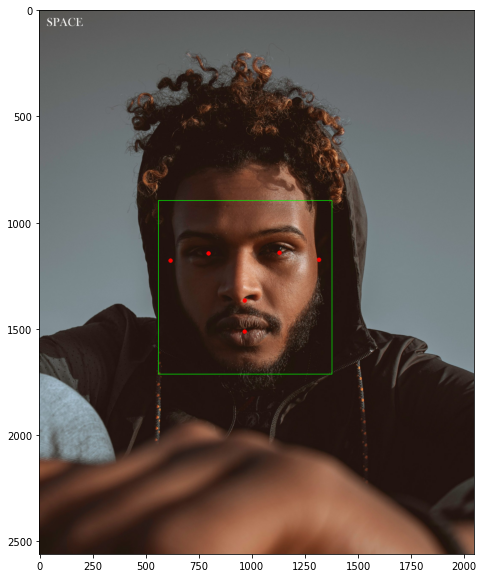

In [60]:
with mp_face_detection.FaceDetection() as face_detection:
    # print(face_detection)
    results = face_detection.process(rgb_image)
    # print(results.detections)
    for detection in results.detections:
        print('Nose tip:')
        print(
            mp_face_detection.get_key_point(
                detection, mp_face_detection.FaceKeyPoint.NOSE_TIP
            )
        )
        
        # copy image
        image_copy = rgb_image.copy()
        
        mp_drawing.draw_detection(
            image_copy, 
            detection, 
            keypoint_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(
                color=(255,0,0),
                thickness=10,
                circle_radius=5
            )
        )
        
        
        # show image
        plt.figure(figsize=(10,10))
        plt.imshow(image_copy)
        plt.show()

In [41]:
dir(mp_face_detection.FaceKeyPoint)

['LEFT_EAR_TRAGION',
 'LEFT_EYE',
 'MOUTH_CENTER',
 'NOSE_TIP',
 'RIGHT_EAR_TRAGION',
 'RIGHT_EYE',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

In [62]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

In [72]:
dir(mp_face_mesh)

['BINARYPB_FILE_PATH',
 'FACE_CONNECTIONS',
 'FaceMesh',
 'NamedTuple',
 'SolutionBase',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'association_calculator_pb2',
 'constant_side_packet_calculator_pb2',
 'detections_to_rects_calculator_pb2',
 'gate_calculator_pb2',
 'image_to_tensor_calculator_pb2',
 'inference_calculator_pb2',
 'logic_calculator_pb2',
 'non_max_suppression_calculator_pb2',
 'np',
 'rect_transformation_calculator_pb2',
 'split_vector_calculator_pb2',
 'ssd_anchors_calculator_pb2',
 'tensors_to_classification_calculator_pb2',
 'tensors_to_detections_calculator_pb2',
 'tensors_to_landmarks_calculator_pb2',
 'thresholding_calculator_pb2']

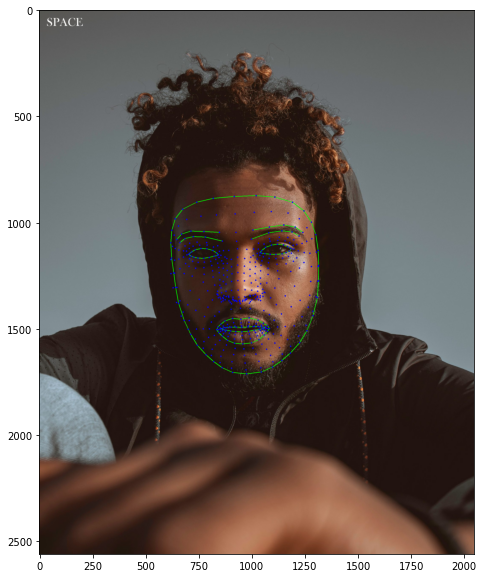

In [73]:
with mp_face_mesh.FaceMesh() as face_mesh:

    results = face_mesh.process(rgb_image)

    # Print and draw face mesh landmarks on the image.
    
    # print(results.multi_face_landmarks)
    
    # copy image
    image_copy = rgb_image.copy()

    for face_landmarks in results.multi_face_landmarks:
        # print('face_landmarks:', face_landmarks)
        mp_drawing.draw_landmarks(
            image=image_copy,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACE_CONNECTIONS
        )
    
    # show image
    plt.figure(figsize=(10,10))
    plt.imshow(image_copy)
    plt.show()

### Object Detection

##### PyTorch

```
pip install torch torchvision
pip install opencv-contrib-python
```

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

https://www.pyimagesearch.com/2021/08/02/pytorch-object-detection-with-pre-trained-networks/

In [26]:
# import the necessary packages
from torchvision import models
import numpy as np
import torch
import cv2
from PIL import Image

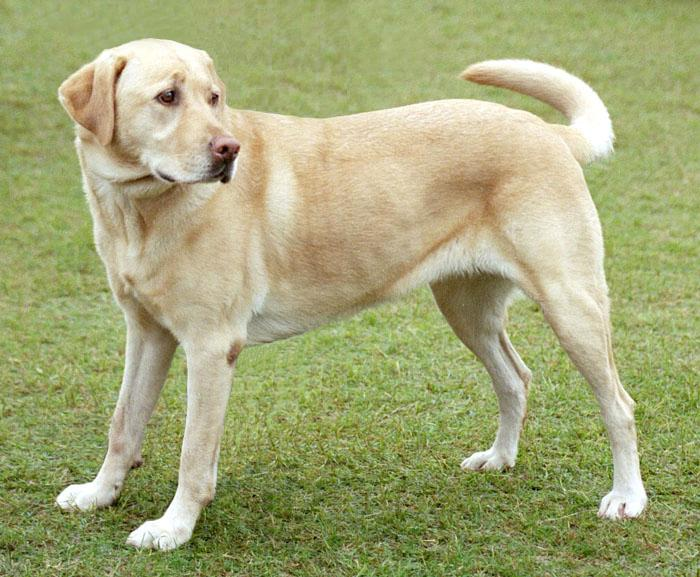

In [27]:
img = Image.open('dog.jpg')
img

In [28]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

AlexNet. It is one of the early breakthrough networks in Image Recognition.

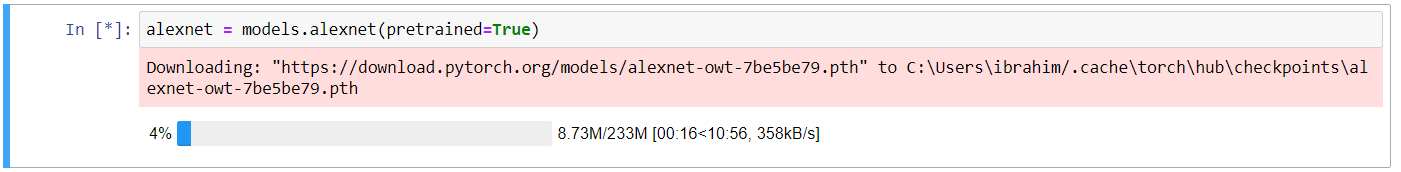

In [4]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\ibrahim/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [29]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [30]:
from torchvision import transforms

transform = transforms.Compose([            #[1]
    transforms.Resize(256),                    #[2]
    transforms.CenterCrop(224),                #[3]
    transforms.ToTensor(),                     #[4]
    transforms.Normalize(                      #[5]
        mean=[0.485, 0.456, 0.406],                #[6]
        std=[0.229, 0.224, 0.225]                  #[7]
    )
])

Next, pre-process the image and prepare a batch to be passed through the network.

In [31]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

# Finally, it’s time to use the pre-trained model to see what the model thinks the image is.
# First, we need to put our model in eval mode.

alexnet.eval()

out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


output vector out with 1000 elements? We still haven’t got the class (or label) of the image. For this, we will first read and store the labels from a text file having a list of all the 1000 labels

https://gist.github.com/ageitgey/4e1342c10a71981d0b491e1b8227328b

In [32]:
with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

classes

['0, tench',
 '1, goldfish',
 '2, great_white_shark',
 '3, tiger_shark',
 '4, hammerhead',
 '5, electric_ray',
 '6, stingray',
 '7, cock',
 '8, hen',
 '9, ostrich',
 '10, brambling',
 '11, goldfinch',
 '12, house_finch',
 '13, junco',
 '14, indigo_bunting',
 '15, robin',
 '16, bulbul',
 '17, jay',
 '18, magpie',
 '19, chickadee',
 '20, water_ouzel',
 '21, kite',
 '22, bald_eagle',
 '23, vulture',
 '24, great_grey_owl',
 '25, European_fire_salamander',
 '26, common_newt',
 '27, eft',
 '28, spotted_salamander',
 '29, axolotl',
 '30, bullfrog',
 '31, tree_frog',
 '32, tailed_frog',
 '33, loggerhead',
 '34, leatherback_turtle',
 '35, mud_turtle',
 '36, terrapin',
 '37, box_turtle',
 '38, banded_gecko',
 '39, common_iguana',
 '40, American_chameleon',
 '41, whiptail',
 '42, agama',
 '43, frilled_lizard',
 '44, alligator_lizard',
 '45, Gila_monster',
 '46, green_lizard',
 '47, African_chameleon',
 '48, Komodo_dragon',
 '49, African_crocodile',
 '50, American_alligator',
 '51, triceratops',
 

In [33]:
# we need to find out the index where the maximum score in output vector out occurs
_, index = torch.max(out, 1)
 
# print(index)

# We will use this index to find out the prediction
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

# print(percentage)

print(classes[index[0]], ' => ' ,percentage[index[0]].item())

208, Labrador_retriever  =>  42.46735763549805


In [34]:
_, indices = torch.sort(out, descending=True)

[
    (classes[idx], percentage[idx].item()) for idx in indices[0][:5]
]


[('208, Labrador_retriever', 42.46735763549805),
 ('207, golden_retriever', 16.6086483001709),
 ('176, Saluki', 15.473832130432129),
 ('172, whippet', 2.7881932258605957),
 ('173, Ibizan_hound', 2.3617053031921387)]

### Where to go from here


start searching for pretrained models and use them according to your purpose, the pretrained models have ton of examples online where you can copy portion of code and then, it depends on your undersanding of python and how to use python in your examples and work.

Next level is to start building your network and improve the created models and thier problems, if you didn't use the model you will never be able to improve and add your own work